In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.interpolate import interp1d
import pandas as pd

0.0
227.87824531062552


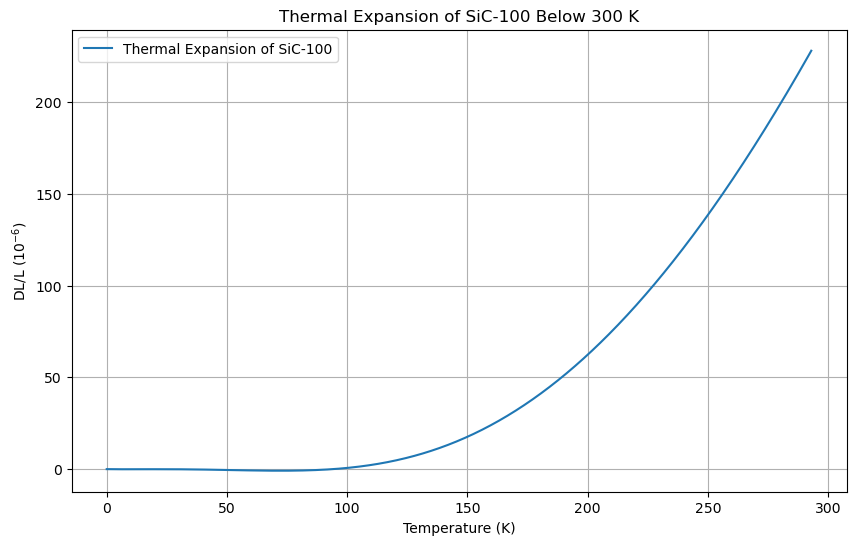

In [35]:
#Plot Dl/L from polynomial coefficients
#the form sum of a_i * T^i
#plottings params: T, Dll

# Define the coefficients of the eighth-order polynomial
#coefficients = [2.43165e-1, -9.25541e-2, 7.38688e-4, 2.44225e-5, 5.68470e-7, 5.94436e-9, -4.04320e-11, 8.70017e-14, -6.64445e-17]
coefficients = [-2.27874e2, -2.0469e-2, 1.86617e-3, -6.11583e-5, 7.15903e-7, -3.40606e-9, 8.84326e-12, -1.24822e-14, 7.54250e-18]
coefficients0 = [0, -2.0469e-2, 1.86617e-3, -6.11583e-5, 7.15903e-7, -3.40606e-9, 8.84326e-12, -1.24822e-14, 7.54250e-18]

# Define the polynomial function
def polynomial(T, coeffs):
    # The polynomial is defined as sum of a_i * T^i
    return sum(c * T**i for i, c in enumerate(coeffs))

# Generate temperature values from 0 K to 300 K
T = np.linspace(0, 293, 1000)

# Calculate the polynomial values for these temperatures
Dll = polynomial(T, coefficients0)

print(values[0])
print(values[-1])

# Plot the polynomial values
plt.figure(figsize=(10, 6))
plt.plot(T, Dll, label='Thermal Expansion of SiC-100')
plt.xlabel('Temperature (K)')
plt.ylabel('DL/L (10$^{-6}$)')
plt.title('Thermal Expansion of SiC-100 Below 300 K')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
def cte_expand_power(a, b, c, d, e, f, g, h, i, temp):
    power_int = np.array([a, b, c, d, e, f, g, h, i])
    T = np.array(temp)
    l = np.log10(T)
    power = np.zeros(len(T))
    for p, i in enumerate(power_int):
        power += i * 1e-6 * l**p

    print(power)

    return 10**power

def cte_expand(a, b, c, d, e, f, g, h, i, temp):
    power_int = np.array([a, b, c, d, e, f, g, h, i])
    T = np.array(temp)
    power = np.zeros(len(T))
    for p, a in enumerate(power_int):
        print('p: ', p, '. a_i: ', a)
        power += a * (T)**p

    print(power)

    return power

p:  0 . a_i:  -227.874
p:  1 . a_i:  -0.020469
p:  2 . a_i:  0.00186617
p:  3 . a_i:  -6.11583e-05
p:  4 . a_i:  7.15903e-07
p:  5 . a_i:  -3.40606e-09
p:  6 . a_i:  8.84326e-12
p:  7 . a_i:  -1.24822e-14
p:  8 . a_i:  7.5425e-18
[-227.94640416 -227.95649823 -228.33809365 -228.7336754  -228.19156239
 -225.59058192 -219.88945336 -210.25026521 -196.07764397 -177.00742823
 -152.87087607 -123.65264827  -89.4530249   -50.45702737   -6.90533256
   40.94591929]


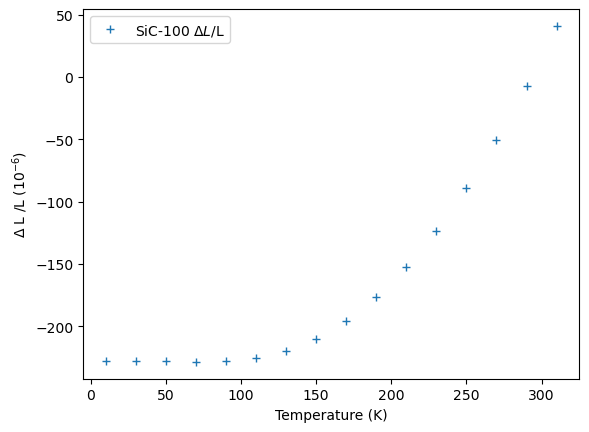

In [43]:
temps = np.linspace(10, 310, 16)
#cte SiC
cteSiC = cte_expand(-2.27874e2, -2.0469e-2, 1.86617e-3, -6.11583e-5, 7.15903e-7, -3.40606e-9, 8.84326e-12, -1.24822e-14, 7.54250e-18, temps)
plt.plot(temps, cteSiC, '+')
plt.ylabel(r'$\Delta$ L /L ($10^{-6}$)')
plt.xlabel('Temperature (K)')
plt.legend([r'SiC-100 $\Delta L$/L'])
plt.show()

In [21]:
# Load the CSV file with proper parsing
def csv2cte(filepath):
    data = pd.read_csv(filepath, skiprows=1, delim_whitespace=True)

    # Extract relevant columns
    split_data = data.iloc[:, 0].str.split(',', expand=True)

    # Extract the relevant columns
    temperatureStr = split_data[0].values
    valueStr = split_data[2].values

    #convert to float
    temperature = temperatureStr.astype(float)
    value = valueStr.astype(float)

    return temperature, value

In [22]:
copper_cte = csv2cte('copper.csv')
silicon_cte = csv2cte('silicon.csv')

/tmp/ipykernel_6490/3425989425.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(filepath, skiprows=1, delim_whitespace=True)
/tmp/ipykernel_6490/3425989425.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(filepath, skiprows=1, delim_whitespace=True)


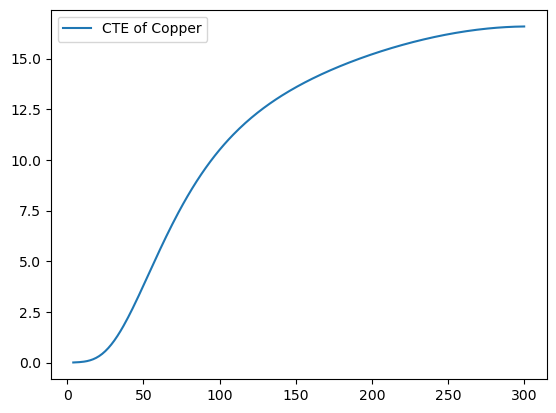

In [36]:
np.array(copper_cte[1])
np.array(copper_cte[0])
plt.plot(copper_cte[0], copper_cte[1], label='CTE of Copper')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('CTE (1/K)')

In [24]:
def lengthChangeWithTemp(material, cte_data, initL, startT, endT):
    print(cte_data)
    temp = np.array(cte_data[0])
    cte = np.array(cte_data[1])

    #interpolate the cte data
    cte_interpolated = interp1d(temp, cte, kind='linear', fill_value="extrapolate")
    temps = np.linspace(endT, startT, 1000)
    cte_int = cte_interpolated(temps)

    #change in length
    DeltaL = initL * np.trapz(cte_int, temps)

    finalL = initL - DeltaL

    return finalL, cte_int, temps

(array([  4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,
        15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,
        26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,
        37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,
        48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,
        59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,
        70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,
        81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,
        92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102.,
       103., 104., 105., 106., 107., 108., 109., 110., 111., 112., 113.,
       114., 115., 116., 117., 118., 119., 120., 121., 122., 123., 124.,
       125., 126., 127., 128., 129., 130., 131., 132., 133., 134., 135.,
       136., 137., 138., 139., 140., 141., 142., 143., 144., 145., 146.,
       147., 148., 149., 150., 151., 152., 153., 1

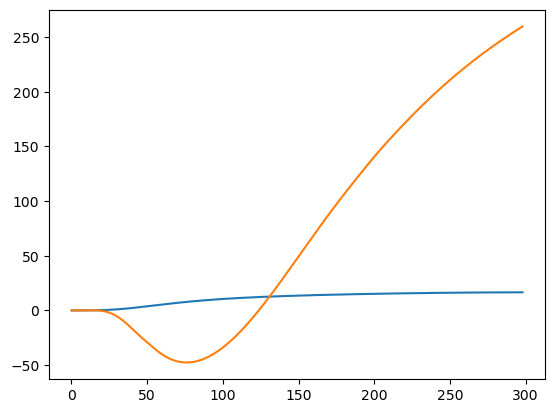

In [25]:
length = 10 #mm
startT = 298 #K
endT = 0.1 #K

results = []

materials = {'copper': copper_cte, 'silicon': silicon_cte}
for material, data in materials.items():
    finalL, cte, temps = lengthChangeWithTemp(material, data, length, startT, endT)
    plt.plot(temps, cte)
    print(material, ': ', finalL, '. : ', 100-finalL/length*100)
    results.append([material, finalL])

In [26]:
print(results)

[['copper', -33374.98351109987], ['silicon', -227807.80300405627]]
